# 개발상의 유의점 

1. 중복된 키값으로 추천을 받을 때 에러
- ex) 연인 (1992 작), 연인 (2002 작) . 다른영화가 같은 키값으로 들어올때

    recommand 함수가 영화를 특정하지 못해 에러가 발생. 그러나 두 영화에 임의로 레이블을 달아서 구분한다면. 다른 중복처리 또한 일반화가 안되는 문제. 그렇다고 중복데이터를 제거하기에는 두 영화 모두 가치가 있을때. 고민점.

2. 필수코드. get_recommendation : 출처는 Ckworld ML ch07.추천시스템에서 도서추천때 개발된 코드이니 확인하시면 좋습니다.
    - 핵심은 키(제목)값과 index 처리 이며. 제목을 인풋으로 넣고 인덱스를 돌려받아. 해당 인덱스를 가진 영화를 5개 보여주는 방식입니다.

In [2]:
#########

# def get_recommendation(title, cos_sim=cos_sim):
#     index = indices[title]
#     sim_scores = pd.Series(cos_sim[index])
#     movie_indices = sim_scores.sort_values(ascending=False).head(6).tail(5).index
#     result = df_for_title.title.iloc[movie_indices]
#     return result

#########

-

In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# import missingno as msno
# from sklearn.feature_extraction.text import TfidfVectorizer
# from IPython.display import Image
# from sklearn.metrics.pairwise import cosine_similarity  #코사인유사도. pariwise는 쌍대비교 (두개체가 동일한지, 얼마나 유사한지를 판단)

In [4]:
# 데이터 경로는 각자환경에 맞게.
df_temp = pd.read_excel("C:/Users/jlune/carbon/project_JI/0.Model/data/wavve_total.xlsx", 
na_values='NaN')

In [5]:
df_temp.head(), len(df_temp), df_temp.columns

(   Unnamed: 0  Unnamed: 0.1              제목     개봉일                평점  \
 0           0             0  반지의 제왕: 반지 원정대  (2001)     95%  8.9 (1m)   
 1           1             1            남색대문  (2002)     79%  7.3 (3k)   
 2           2             2       멀홀랜드 드라이브  (2001)   86%  7.9 (344k)   
 3           3             3   해리 포터와 마법사의 돌  (2001)   87%  7.6 (743k)   
 4           4             4           펄프 픽션  (1994)     95%  8.9 (1m)   
 
                            장르     재생시간                  감독  \
 0              판타지 , 액션 , 드라마  2시간 59분       Peter Jackson   
 1  드라마 , 로맨스 , Made in Europe  1시간 25분        Yee Chin-Yen   
 2  스릴러 , 드라마 , Made in Europe  2시간 27분         David Lynch   
 3               판타지 , 가족 , 액션  2시간 32분      Chris Columbus   
 4              스릴러 , 범죄 , 드라마  2시간 34분   Quentin Tarantino   
 
                                                  출연진  \
 0  Elijah Wood,Ian McKellen,Liv Tyler,Viggo Morte...   
 1  Gwei Lun-mei,Chen Bolin,Liang Yolin,Chau Ching...   
 2 

In [6]:
# 개봉년도 기준 sorting
# index 초기화 및 필요컬럼 추출
df_temp.sort_values(by='개봉일', ascending=False, inplace=True)
df_temp.reset_index(inplace=True)
df_temp = df_temp.loc[:,'제목':'시놉시스']

In [7]:
df_temp.head(10)

,제목,개봉일,평점,장르,재생시간,감독,출연진,시놉시스
0,싱어송,(2022),NaN,드라마,1시간 42분,Na O-heon,"Heo Ga-yoon,Yoo Young-jae,Moon Ji Hoo",노래가 하고 싶어 무작정 서울로 상경한 ‘선혜’와\n 하루 빨리 유명해지고 싶은 무...
1,특송,(2022),71% 6.9,"액션 , 범죄 , 스릴러",1시간 49분,Park Dae-min,"Park So-dam,Kim Eui-sung,Song Sae-byuk,Yeom Hy...",예상치 못한 배송사고로 걷잡을 수 없는 사건에 휘말린 특송 전문 드라이버 은하. 어...
2,더 테러 라이브 인 하이스쿨,(2022),46% 4.3,"공포 , 스릴러",1시간 28분,Lee Ann Kurr,"Montse Hernandez,Cheyenne Haynes,Anthony Keyva...",어릴 적부터 단짝이었던 제인과 메릿. 고등학교에 올라가면서 소원해진 관계를 회복하고...
3,셰터드,(2022),64% 5.0,스릴러,1시간 32분,Luis Prieto,"Cameron Monaghan,Lilly Krug,Frank Grillo,Sasha...",외딴 집에 사는 부유한 그는 완벽한 미모의 섹시한 그녀를 만나고 격정적인 밤을 보낸...
4,해리 포터 20주년: 리턴 투 호그와트,(2022),89% 8.0 (34k),"다큐멘터리 , 가족",1시간 43분,"Eran Creevy , Joe Pearlman , Casey Patterso...","Daniel Radcliffe,Rupert Grint,Emma Watson,Bonn...","‘해리포터와 마법사의 돌' 20주년 기념 스페셜. 다니엘 래드클리프, 루퍼트 그린트..."
5,걸 위드 더 카메라,(2022),NaN,다큐멘터리,1시간 9분,Ahn Hee-su,NaN,"20대 초중반의 또래를 타깃으로 이미지의 중의적 의미, 그 사이의 괴리감에 대해 함..."
6,트로트는 인생이다,(2022),45%,"드라마 , 코미디",1시간 16분,NaN,"Jang So-young,Kim Kyung-Jin,Kim Sol-bi","트로트 가수 ‘신하’(김경진, 김동찬)는 최근 고민이 많다\n 아무리 신곡을 내고 ..."
7,키미,(2022),75% 6.3 (14k),"스릴러 , 범죄 , 드라마",2시간 29분,Steven Soderbergh,"Zoë Kravitz,Byron Bowers,Jaime Camil,Erika Chr...","코로나19가 덮친 시애틀, 광장 공포증 환자인 앤절라는 집을 두문불출하며 키미라는..."
8,효자,(2022),55%,"공포 , 코미디",1시간 57분,Lee Hoon-guk,"Kim Roi-ha,Lee Cheol-min,Jung Kyung-ho,Park Hy...",엄마가 돌아가시고 얼마 지나지 않아 닥친 태풍 소식에 5명의 형제들은 함께 산소를 ...
9,대한민국 대통령,(2022),75%,다큐멘터리,1시간 11분,NaN,"Lee Jae-myung,Yoon Suk-yeol,Sim Sang-jung,Ahn ...","5년마다 찾아오는 대한민국 최고의 이벤트 대선을 앞두고, 정치인부터 국민들에게 직접..."


- df 만들고 전처리 part

In [8]:
# !pip install missingno

AxesSubplot(0.125,0.125;0.698618x0.755)
Index(['제목', '개봉일', '평점', '장르', '재생시간', '감독', '출연진', '시놉시스'], dtype='object')


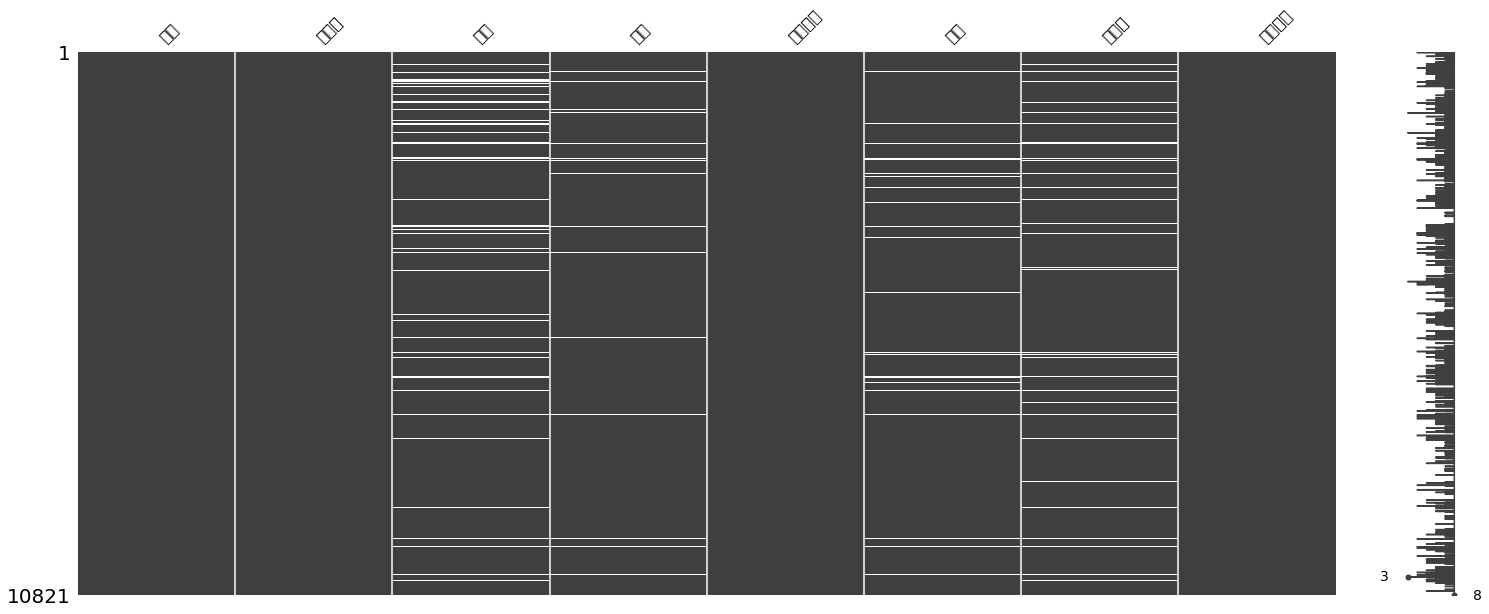

In [9]:
# 결측치를 시각적 표현으로 돌려줌. 컬럼네임을 영어로 할것.
import missingno as msno
print(msno.matrix(df_temp))
print(df_temp.columns)

In [10]:
# 중복값확인 = 0
df_temp.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10816    False
10817    False
10818    False
10819    False
10820    False
Length: 10821, dtype: bool

In [11]:
# 결측치 확인 다수 있으나, 중요 피쳐 아니야. 
df_temp.isnull().sum(), len(df_temp)

(제목        0
 개봉일       0
 평점      632
 장르      197
 재생시간      0
 감독      401
 출연진     518
 시놉시스     28
 dtype: int64,
 10821)

In [12]:
df = df_temp.copy()
df.head(3)

,제목,개봉일,평점,장르,재생시간,감독,출연진,시놉시스
0,싱어송,(2022),NaN,드라마,1시간 42분,Na O-heon,"Heo Ga-yoon,Yoo Young-jae,Moon Ji Hoo",노래가 하고 싶어 무작정 서울로 상경한 ‘선혜’와\n 하루 빨리 유명해지고 싶은 무...
1,특송,(2022),71% 6.9,"액션 , 범죄 , 스릴러",1시간 49분,Park Dae-min,"Park So-dam,Kim Eui-sung,Song Sae-byuk,Yeom Hy...",예상치 못한 배송사고로 걷잡을 수 없는 사건에 휘말린 특송 전문 드라이버 은하. 어...
2,더 테러 라이브 인 하이스쿨,(2022),46% 4.3,"공포 , 스릴러",1시간 28분,Lee Ann Kurr,"Montse Hernandez,Cheyenne Haynes,Anthony Keyva...",어릴 적부터 단짝이었던 제인과 메릿. 고등학교에 올라가면서 소원해진 관계를 회복하고...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10821 entries, 0 to 10820
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      10821 non-null  object
 1   개봉일     10821 non-null  object
 2   평점      10189 non-null  object
 3   장르      10624 non-null  object
 4   재생시간    10821 non-null  object
 5   감독      10420 non-null  object
 6   출연진     10303 non-null  object
 7   시놉시스    10793 non-null  object
dtypes: object(8)
memory usage: 676.4+ KB


In [14]:
## df[조건식] #na=False 옵션은 조건은 트루 폴스로 비교할때 na 값이 들어가 오류가 나기에 그것을 무시하라는 의미
## 10821개의 데이터중 액션은 3288개.
df[df['장르'].str.contains('액션', na=False)].count(axis=0)

제목      3288
개봉일     3288
평점      3218
장르      3288
재생시간    3288
감독      3199
출연진     3223
시놉시스    3284
dtype: int64

In [15]:
# 장르 번호 부여 용 dict 셋팅 
idx = {'1':'액션', '2':'애니메이션', '3':'코미디', '4':'범죄',
       '5':'다큐멘터리', '6':'드라마', '7':'판타지', '8':'역사',
       '9':'공포', '10':'가족', '11':'음악', '12':'스릴러',
       '13':'로맨스', '14':'SF', '15':'스포츠', '16':'전쟁',
       '17':'서부', '18':'Reality TV', '19':'Made in Europe'}

In [16]:
# 장르별 영화 분포를 보고자 시리즈 셋팅.
s = []
for i in idx:
    gene = len(df[df['장르'].str.contains(idx[i], na=False)])
    s.append(gene)
    # print(gene)
# g1 = len(df[df['장르'].str.contains('액션')])
# idx["1"]
print(s, len(s),'개 장르') 

[3288, 829, 3040, 1756, 651, 5598, 1459, 494, 1822, 880, 318, 3486, 2037, 1328, 218, 474, 114, 6, 1618] 19 개 장르


In [17]:
df_g = pd.DataFrame(list(idx.items()),
        columns=['Category_id', 'genre'],
        index=None)
df_g['Count_jenre'] = s  # 장르 개수 카운트한 컬럼 합치기
df_g

# 드라마와 스릴러 코미디 로맨스 가 4대 장르인데. 장르별 추천은 완성못했으므로 추후 가중치를 달리 쓸 수 있을지 고민거리로.

,Category_id,genre,Count_jenre
0,1,액션,3288
1,2,애니메이션,829
2,3,코미디,3040
3,4,범죄,1756
4,5,다큐멘터리,651
5,6,드라마,5598
6,7,판타지,1459
7,8,역사,494
8,9,공포,1822
9,10,가족,880


In [18]:
# df_syn은 모델 원을 위해 (시놉기반)
# df_info는 모델 투를 위해 (장르, 감독, 출연진, 시놉, 제목은 어떻게 하지?)
df_syn = df[['제목','시놉시스']]
df_info = df[['제목', '시놉시스', '장르', '감독', '출연진']]
# df_syn.head(5)
# df_info.head()

In [19]:
df_syn.nunique() #제목의 개수가 적은것을 보아. 같은 이름의 영화가 17개 가량 있다.

제목      10670
시놉시스    10787
dtype: int64

In [20]:
df_info.nunique() # 감독은 보통 1명인데 4000개 가량 중복된다는 걸 미루어 보아. 
                  # 원 - 투의 유사도 변화를 체킹해봐야.

제목      10670
시놉시스    10787
장르       2932
감독       6596
출연진     10292
dtype: int64

In [21]:
# 줄거리가 없는 영화 삭제후 item개수 확인
df_syn = df_syn.dropna(subset=['시놉시스']) #시놉시스가 NaN값이면 행 삭제.
len(df_syn)

10793

# 추천시스템 One_two

- 일반적으로 유사도를 측정하기 위해 정량화 하는 방법
    - 단순히 같은 단어의 개수를 사용하는 법
    - 형태소로 나누어 형태소를 비교하는 법
    - 자소 단위로 나누어 비교하는법 자소 : 자음하나 모음하나 단위.
    -     
        
- 이 책 (자연어처리 - 앵무새) 에서는 딥러닝을 기반으로 텍스트의 유사도를 측정할 것.
    텍스트를 벡터화 (수치화) 한 후 벡터간의 유사도를 판단할것. (보충하겠음)
    
- 자주 쓰이는 4개의 유사도 측정방법은

    자카드 유사도,
    유클리디언 유사도 (걍 거리)
    맨해튼 유사도 (네모네모박스 최적 거리)
    코사인 유사도 (벡터간의 각도 비교로 유사도 판단)

- 벡터화 전략은 TF-IDF (단어 빈도-역문서 빈도) 벡터화

In [22]:
# from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
# error index 관련 return self._engine.get_loc(casted_key) #drop으로 중간 인덱스를 날렸기 때문으로 추정
 # >>> index reset 으로 해결.
df_syn.reset_index(drop=True, inplace=True)
sent = []

for i in (range(0,len(df_syn))):
    content = df_syn['시놉시스'][i]
    sent.append(content)
len(sent)
# 10821개 # 10793개

10793

In [24]:
tfidf=TfidfVectorizer()
tfidf_matrix=tfidf.fit_transform(sent)

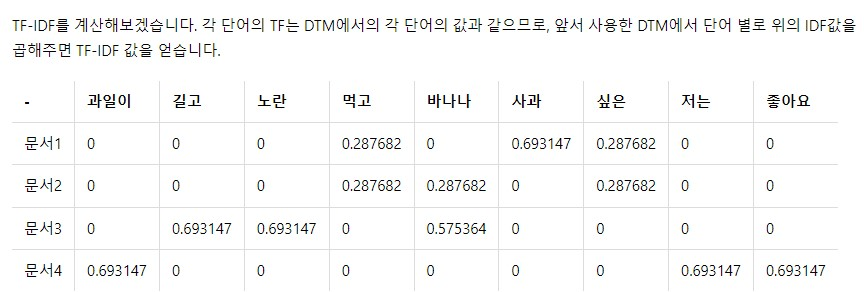

In [25]:
# !pip install IPython
from IPython.display import Image
Image('data/tfidf_matrix.jpg') #tfidf matrix 의 모습

In [ ]:
print(tfidf_matrix) # 형태 보고자 할땐 프린트 해볼것.

In [27]:
tfidf_matrix[0].shape #(1, 160805) 희소백터의 문제 보여. sparce
# print(np.asarray(tfidf_matrix[0]))

(1, 160805)

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cos_sim.shape, type(cos_sim)

((10793, 10793), numpy.ndarray)

In [29]:
# 제목열과 시놉시스만 가져와서 셋팅. 깔끔한 방식은 아니니 df 상황에 맞추어 고려할것.
df_for_title = df_syn.copy()
len(df_for_title)

10793

In [30]:
df_for_title.rename(columns= {'제목' : 'title'}, inplace=True)
df_for_title.head()

,title,시놉시스
0,싱어송,노래가 하고 싶어 무작정 서울로 상경한 ‘선혜’와\n 하루 빨리 유명해지고 싶은 무...
1,특송,예상치 못한 배송사고로 걷잡을 수 없는 사건에 휘말린 특송 전문 드라이버 은하. 어...
2,더 테러 라이브 인 하이스쿨,어릴 적부터 단짝이었던 제인과 메릿. 고등학교에 올라가면서 소원해진 관계를 회복하고...
3,셰터드,외딴 집에 사는 부유한 그는 완벽한 미모의 섹시한 그녀를 만나고 격정적인 밤을 보낸...
4,해리 포터 20주년: 리턴 투 호그와트,"‘해리포터와 마법사의 돌' 20주년 기념 스페셜. 다니엘 래드클리프, 루퍼트 그린트..."


In [31]:
# indices = pd.Series(df.index, index=df.title)
indices = pd.Series(df_for_title.index, index=df_for_title.title)
# 코드의 의미는 df_syn의 인덱스를 시리즈로.. 요게 본체
# 신기하게 본체의 인덱스를 제목으로 사용한다. 
# 나중에 인덱스를 key로 제목을 출력하기 위함  = 신기방기 한 방법

In [32]:
indices # title 열을 인덱스로 사용. 인덱스 값을 밸류로 사용. 서로 바뀐 구조.

title
싱어송                          0
특송                           1
더 테러 라이브 인 하이스쿨              2
셰터드                          3
해리 포터 20주년: 리턴 투 호그와트        4
                         ...  
북극의 나누크                  10788
키드                       10789
The Pawnshop             10790
The Rink                 10791
The Fireman              10792
Length: 10793, dtype: int64

In [33]:
def get_recommendation(title, cos_sim=cos_sim):
    index = indices[title]
    sim_scores = pd.Series(cos_sim[index])
    movie_indices = sim_scores.sort_values(ascending=False).head(6).tail(5).index
    result = df_for_title.title.iloc[movie_indices]
    return result

In [34]:
get_recommendation('셰터드')

2450                롤링 투 유
9916                    연인
1522               애나벨 집으로
1502                  드림랜드
7978    닉과 노라의 인피니트 플레이리스트
Name: title, dtype: object

In [35]:
get_recommendation('드림랜드')

8053               동거, 동락
3                     셰터드
2309               최후의 배틀
5410    더 바버 : 사라진 연쇄 살인마
7203              머신건 프리처
Name: title, dtype: object

In [36]:
get_recommendation('최후의 배틀')

7166     실종: 악령의 부활
4554        바운티 헌터스
3739        황야의 총잡이
10487          사망유희
1218         원티드 킬러
Name: title, dtype: object

In [37]:
# get_recommendation('연인') ## 중복 키값으로 에러 반환

 - 

In [38]:
get_recommendation('부산행')

2335     웨스트 오브 헬
4982       최후의 인류
618          최미역행
679           러브컷
10514    카산드라 크로싱
Name: title, dtype: object

In [39]:
# 20개만 추려 상관관계 보고자.
alist = []
for i in range(20):
    c = df_syn['제목'][i]
    alist.append(c)
# alist
len(alist)

20

In [40]:
# get_recommendation('코만도')
# get_recommendation('베스트셀러')

In [ ]:
# 인덱스 만들기 
lambda x : x for 

In [47]:
# type(get_recommendation(영화제목)) : 판다스의 시리즈
index_movie = [lambda x]
for i in alist:
    try:
        series = get_recommendation(i)
        pd.DataFrame([])
        # print(i)
    except:
        pass

SyntaxError: 'return' outside function (3596570567.py, line 3)

In [48]:
type(get_recommendation('라스트 콘서트'))

pandas.core.series.Series

In [ ]:
df_for_title.columns

Index(['title', '시놉시스'], dtype='object')

In [ ]:
# 영화이름을 치면. 인덱스 반환
print(df_for_title.index[(df_for_title['title'] == '연인')].to_list())

[8715, 9916]


In [ ]:
# x에 영화의 인덱스를 치세요~ 
x = 8715
# df_for_title['title'][(df_for_title.index == x)].tolist()
df_for_title['title'][(df_for_title.index == x)], df_for_title['시놉시스'][x]

(8715    연인
 Name: title, dtype: object,
 "중국 역사상 가장 황금기였던 당나라. 그러나 서기 859년, 당 왕조는 바야흐로 쇠퇴의 길에 들어서게 된다. 무능한 왕조와 부패한 대신들로 나라 전체가 불안에 휩싸이고 온 나라에 반란군이 들끓는다. 그 중 가장 이름난 반란조직이 바로 '비도문' (House of Flying Daggers)이다. 비밀조직인 비도문은 민중에게 관에 저항할 것을 호소하고, 자유를 추구하였다. 도성 근처에 위치한 팽 티안 지방에 출몰하는 비도문은 민중들을 혼란시키고, 관의 힘을 약하게 하여 지방 관리들에게는 그야말로 눈엣가시 같은 존재이다.  비도문이 관과 싸워온지 수년이 흐르고, 우두머리가 전투에서 살해당하게 된다. 하지만 이후에도 조직은 점점 세를 얻어간다. 결국 팽 티안 성의 관리인 레오(유덕화)와 진(금성무)은 열흘 안에 이 조직의 새로운 우두머리를 잡아오라는 명을 받는다. 레오는 인근지방 홍등가에 새로 나타난 무희인 메이(장쯔이)를 의심하게 되는데, 실은 그녀는 죽은 비도문 두목의 딸이다. 레오는 메이를 데려다 심문을 하지만 입을 열지 않자 다른 수를 꾸민다. 진으로 하여금 ‘풍’이라는 떠돌이 무사로 변장을 하게 해 메이를 감옥에서 구출한 뒤 그녀의 신임을 얻어내고 함께 '비도문'의 은신처로 떠나는 계획을 세운 것이다.  이들의 계획은 성공을 거둬 결국 진과 메이는 은둔처까지의 긴 여정을 함께 하게 되고 얼마 지나지 않아 메이는 베일에 싸인 자신의 동반자에게 점점 감정을 갖게 된다. 진 역시 메이의 매력에 흠뻑 빠져드는 자신을 발견하게 되고 둘은 서로의 감정을 부정하려 애쓰지만 그럴수록 그들의 마음은 더욱 더 서로를 갈망하게 된다. 그러나 처음의 계획과는 달리 진을 정말로 죽이려는 낯선 무사들이 나타나고 비도문은 점점 실체를 드러내는데... 진과 메이, 그들의 사랑은 진심일까?")

In [ ]:
# x에 영화의 인덱스를 치세요~ 
x = 10689
# df_for_title['title'][(df_for_title.index == x)].tolist()
df_for_title['title'][(df_for_title.index == x)], df_for_title['시놉시스'][x]

(10689    7년만의 외출
 Name: title, dtype: object,
 '편집인인 리처드(Richard Sherman: 톰 이웰 분)는 부인과 아들을 피서지에 보낸 후, 오랜만에 혼자 생활을 하며 해방감을 맛본다. 그때 불현듯 그의 마음을 사로잡은 생각이 "만약 내가 바람을 피워본다면"이라는 것. 마침 같은 아파트 2층에 말할 수 없이 아름다운 금발 미녀가 이사를 온다. 우여곡절 끝에 그녀를 자기 아파트로 초대하는데, 리처드에겐 선천적으로 과대망상벽이 있다. 아가씨를 초대해놓고 그녀가 나타나길 기다리는 동안, 그는 혼자 간호원과 연애를 한다거나 자기 여비서와 맹렬한 사랑에 빠지는 등의 황당무계한 망상에 빠져든다.  한편 금발 미녀와의 이상한 상상에도 탐닉해 있을 즈음, 피서지의 아내로부터 전화가 걸려온다. 아내는 그곳에서 리처드의 친구인 탐을 만났다고 말한다. 리처드는 이제 아내의 거동을 불안하게 느끼고 별의별 망상을 다한다. 다음날 리처드는 자기망상의 원인을 한 의사의 연구 논문에서 찾아낸다. 그 의사는 "모든 남자는 결혼 7년째에 이르면 바람을 피고 싶은 충동에 시달린다"고 주장한다. 그의 망상벽은 한층 심해진다. 그가 금발 아가씨에 대한 관심을 갖게 되면서부터, 망상의 불안하고 그로테스크한 정도가 심화되는 것 같았다. 예컨대, 금발 미녀가 갑자기 TV방송에 나와 자기와 리처드와의 수상한 관계를 까발리는 등의 망상은 리처드를 완전히 녹초상태에 빠지게 한다. 초조해진 그는 아가씨를 유혹해 함께 영화를 보러간다. 영화관에서 나온 직후, 유명한 지하철 통풍구 씬이 등장한다.  그날밤 금발 미녀는 날씨가 너무 덥다고 냉방장치가 있는 리처드의 방으로 와서 하루밤을 지내게 되나 두 사람 사이에는 아무 일도 없었다. 하지만 리처드는 이번엔 아내가 자신에게 피스톨을 쏘는 망상때문에 실신지경이 되고 만다. 다음날 상냥하고 마음씨 친절한 아가씨의 보살핌으로 겨우 기력을 회복한 리처드. 입에 아가씨가 찍어놓은 감사의 키스 마크를 간직한 채, 모든 망상을 청산하고

In [ ]:
print (df.index[(df['Name'] == 'blue')].tolist())

In [ ]:
df_for_title.f

,title,시놉시스
0,싱어송,노래가 하고 싶어 무작정 서울로 상경한 ‘선혜’와\n 하루 빨리 유명해지고 싶은 무...
1,특송,예상치 못한 배송사고로 걷잡을 수 없는 사건에 휘말린 특송 전문 드라이버 은하. 어...
2,더 테러 라이브 인 하이스쿨,어릴 적부터 단짝이었던 제인과 메릿. 고등학교에 올라가면서 소원해진 관계를 회복하고...
3,셰터드,외딴 집에 사는 부유한 그는 완벽한 미모의 섹시한 그녀를 만나고 격정적인 밤을 보낸...
4,해리 포터 20주년: 리턴 투 호그와트,"‘해리포터와 마법사의 돌' 20주년 기념 스페셜. 다니엘 래드클리프, 루퍼트 그린트..."
...,...,...
10788,북극의 나누크,로버트 플래허티는 몇명의 이누이트의 안내로 북극을 탐험하고 돌아온 뒤 영화를 완성하...
10789,키드,부유한 화가에게 버림받고 갓난 어린 아이를 병원에서 낳은 여자가 키울 능력이 없어 ...
10790,The Pawnshop,A pawnbroker's assistant deals with his grumpy...
10791,The Rink,"After amusements working in a restaurant, Char..."


In [ ]:
get_recommendation('폴리스 스토리 4: 간단임무')

9511                성룡의 C.I.A
1396                 스파이 지니어스
4411    끝까지 살아 남아라 : 제2차 세계대전
5009                    핫 퍼슈트
1707                터키쉬 아이스크림
Name: title, dtype: object

In [ ]:
alist

['싱어송',
 '특송',
 '더 테러 라이브 인 하이스쿨',
 '셰터드',
 '해리 포터 20주년: 리턴 투 호그와트',
 '걸 위드 더 카메라',
 '트로트는 인생이다',
 '키미',
 '효자',
 '대한민국 대통령',
 '코만도',
 '야쿠자 어쌔신',
 'Trouble Sleeping',
 '사진사의 여자',
 '머시블랙: 저주 받은 아이',
 '경관의 피',
 '수호무적',
 '삼국지 관운장: 청룡언월도',
 '맨발의 승리',
 '베스트셀러']

In [ ]:
a = 'str'
a[0]

's'

In [ ]:
get_recommendation(alist[0])
get_recommendation(alist[1])
get_recommendation(alist[2])
get_recommendation(alist[3])
get_recommendation(alist[4])
get_recommendation(alist[5])
get_recommendation(alist[6])
get_recommendation(alist[7])
get_recommendation(alist[8])
get_recommendation(alist[9])
# get_recommendation(alist[10])
get_recommendation(alist[11])
get_recommendation(alist[12])
get_recommendation(alist[13])
get_recommendation(alist[14])
get_recommendation(alist[15])
get_recommendation(alist[16])
get_recommendation(alist[17])
get_recommendation(alist[18])
# get_recommendation(alist[19])

2711     멋진 얼간이들
5269          킬러
6480     줌 피시 월드
1362     데이 앤 나잇
10080      꿈의 구장
Name: title, dtype: object

In [ ]:
for i in alist:
    x =get_recommendation(i[])


KeyError: '싱'

In [ ]:
get_recommendation('13일의 금요일 6: 제이슨 살아있다')

10310            13일의 금요일 4
10386            13일의 금요일 2
7807               13일의 금요일
9037                빅 팻 라이어
10143    13일의 금요일 7: 새로운 살인
Name: title, dtype: object

In [ ]:
get_recommendation('떠오르는 태양')

4802    세일러복과 기관총 – 졸업
4675            퍼펙트 웨폰
2187          혈랑: 붉은전사
5428             밀실 살인
9962              일촉즉발
Name: title, dtype: object

In [ ]:
get_recommendation('로드 투 차이나')

1888     버터플라이 복서
5984         피해자들
6118         더 저지
5145      사랑이 이긴다
10130        레인 맨
Name: title, dtype: object

In [ ]:
get_recommendation('돈 세이 워드')  # 주변 공백 입력도 처리해주는 함수 개발해야 for 안에서 레커멘드 호출시 에러. 이유를...

2741                   맨디
2506    파라노말 액티비티: 드림 하우스
5064              퇴마; 무녀굴
1180             어드벤처 보이즈
7012                트레스패스
Name: title, dtype: object

In [ ]:
get_recommendation('사랑의 파도')

9085              트랜스포터
9506             언더 더 선
6307         더 웹툰: 예고살인
2483    적인걸5: 측천무후 지유명도
5008           포인트 브레이크
Name: title, dtype: object

In [ ]:
get_recommendation('적각비협')

4168    봉신연의: 영웅의 귀환
1790          완벽한 손님
9421            중화영웅
110            최선의 삶
3017         라이즈 위 텔
Name: title, dtype: object

In [ ]:
get_recommendation('포카혼타스')

667                 메가 블리자드
8960           매트릭스 3: 레볼루션
2248     로스트 바이킹: 전쟁의 신의 아들
6293              페어런트 트레이닝
10055                 다크 엔젤
Name: title, dtype: object

In [ ]:
get_recommendation('이탈자')

2513    허리케인: 배틀 오브 브리튼
8583             안소니 짐머
2605          303 전투비행단
855                 비커밍
5340    대전차 특공대: 스페셜 포스
Name: title, dtype: object